<a href="https://www.kaggle.com/code/nikolamurgovski/phone-repair-estimation?scriptVersionId=184804550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Predicting Mobile Phone Repair Durations Using Machine Learning**
*Nikola Murgovski, 
 89221036@student.upr.si*
## **1.  Introduction to the Project**
In today's fast paced world, mobile phones have become an indispensable part of our daily lives. As reliance on these devices grows, so does the need for efficient and timely repairs when they inevitably break down. Estimating the duration of mobile phone repairs accurately is crucial for both service providers and customers, ensuring smooth operations and high satisfaction levels. This project, aims to analyze and predict the repair times for various mobile phone brands and models on data that I took from a company in North Macedonia, meaning this project can help the mobile service company in their work. We have a dataset that includes details about phone brands, models, the nature of problems, and repair timelines, we employ machine learning techniques to develop predictive models. These models help in estimating the time required to complete repairs based on historical data.
#### **1.1 Key Objectives of this project are:**
* **Understand the factors influencing repair durations**: By examining the dataset, we aim to identify significant features that impact the repair time.
* **Develop predictive models**: Using machine learning algorithms, we create models to predict the repair duration for different phone issues.
* **Evaluate model performance**: We compare the effectiveness of various algorithms, including decision trees, and logistic regression, to determine the most accurate predictor.
* **Provide actionable insights**: The results of this analysis can assist the specific repair service that we got this dataset from in improving their operations, managing customer expectations, and optimizing resource allocation.



In [1]:
# Importing libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np

## **2. The Dataset used**
The dataset that we used in this project is from a company located in North Macedonia, they are a mobile repair shop and they accepted my offer to analyze their data. I find this project more interesting since we are using some data from not such a big company. 
#### **2.1. Dataset properties**
The dataset that we have comprises detailed records of mobile phone repairs, including essential attributes such as the phone brand, phone model, the date the phone was received for repair, the date it was ready, and the specific problem encountered. This dataset spans various brands and models, providing a comprehensive overview of repair activities. Each entry in the dataset represents an individual repair instance, allowing for the analysis of repair durations and the identification of patterns and trends. The data includes categorical variables representing the phone brand, model, and type of problem, as well as date variables from which repair duration is calculated. This diverse and well-structured dataset forms the foundation for developing machine learning models to predict repair times and gain valuable insights into the factors influencing these durations.

#### **2.2. Exploring the data**
As we can see below, the columns are Phone Brand, Phone Model, Date Revieved, Date Ready and Phone Problem. The good thing about this dataset is that the dates for arrival and complete are well structured and it will be easier to work with it when we have to calculate the duration time. Also, the phone problems are categorical, they are not manually written which will make the process of analyzing and comparing easier for the model. Every row represents a individual repair and it clearly gives us the phone brand and phone model which is crucial for this project.
At first sight the data we have looks good and well structured, we have to check for some mistakes and correct them to make the model work as perfect as we want it to be.

In [2]:
# loading the dataset and displaying the first rows
df = pd.read_csv('/kaggle/input/dataset-sfs/dataset-sfs.csv')
df.head()

,Phone Brand,Phone Model,Date Received,Date Ready,Phone Problem
0,Samsung,Galaxy S10,2022-05-15,2022-05-20,LCD Replacement
1,iPhone,12 Pro Max,2022-06-10,2022-06-15,Battery Replacement
2,Google,Pixel 5,2022-07-01,2022-07-05,Charging Port Repair
3,Huawei,P40,2022-08-02,2022-08-07,Battery Replacement
4,OnePlus,9T,2022-09-05,2022-09-10,Camera Repair


## **3. Data Preprocessing**
Data Preprocessing is crucial for any ML project, it's for cleaning data, formatting and organizing raw data before it is used for the model. We do this step to be sure that the data we have doesnt have missing values or inconsistencies that can negatively impact the performance of the model.
#### **3.1 Missing Values**
Firstly we are searching for missing values, as we can see below the dataset doesnt have zero values in any column. By executing the function below, I confirmed that the dataset was free from any missing values, which is critical for the accuracy and validity of subsequent analyses and machine learning modeling.

In [3]:
# check for missing values, zero values in each column
print(df.isnull().sum())

Phone Brand      0
Phone Model      0
Date Received    0
Date Ready       0
Phone Problem    0
dtype: int64


#### **3.2 One-Hot Encoding**
We are using one-hot encoding technique to convert categorical variables into a format that can improve the model performance later. Many machine learning algorithms cannot directly work with categorical data, and thus, one-hot encoding is applied to transform these categorical variables into numerical format.
We are applying one-hot encoding to columns: Phone Brand, Phone Model and Phone Problem. The function call below creates new columns for each category in the categorical columns we chose. Each categorical column is replaced with boolean values true or false (binary values). With doing this we created 355 columns and data is hard to read for a human eye but easier for the algorithm and model to compute.

In [4]:
# one-hot encoding on categorical variables 
df = pd.get_dummies(df, columns=['Phone Brand', 'Phone Model', 'Phone Problem'])
df.head()

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Model_Y9 Prime 2019,Phone Model_Y9s,Phone Problem_Battery Replacement,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


#### **3.3 Convert date columns to get duration**
In our analysis, converting the 'Date Received' and 'Date Ready' column to datetime format is crucial for standardizing the date entries across the dataset. This transformation ensures that all dates are uniformly represented and can be accurately processed for further analysis. 

#### **3.3.1 Transforming the 'Date Recieved' column**
Subsequently, we extract additional temporal features from the 'Date Received' column to enrich our dataset. By deriving 'Month Received' and 'Day of Week Received', we introduce new dimensions to our data. These features enable us to explore potential patterns in repair durations across different months and days of the week. This preprocessing step not only enhances the granularity of our analysis but also prepares the data for modelling, which can effectively leverage temporal insights to predict repair durations accurately. The resulting dataset provides a comprehensive foundation for investigating factors influencing repair times and optimizing service operations in the mobile phone repair industry.

In [5]:
# Convert 'Date Received' to datetime format
df['Date Received'] = pd.to_datetime(df['Date Received'])

# Extract additional features from 'Date Received'
df['Month Received'] = df['Date Received'].dt.month
df['Day of Week Received'] = df['Date Received'].dt.dayofweek
df.head()

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Problem_Battery Replacement,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair,Month Received,Day of Week Received
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,5,6
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,6,4
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,7,4
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,8,1
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,9,0


#### **3.3.2 Transforming the 'Date Ready' column to get Repair Duration**
We are doing the same thing for the 'Date Ready' column by transforming it into datetime format using the pandas library. And based on the columns for 'Date Recieved' and 'Date Ready' converted into datetime format we can calculate the 'Repair Duration' for every repair. For the 'Date Ready' column we are not extracting the month and the day of the week since it is not necessary for later. We will only be using the Month and Day Of The Week for receiving date of repairs, with that later we can see if repair durations vary based on the time of the year. Knowing the day of the week and month when repairs are initiated allows the service provider to set realistic expectations for customers regarding repair times. It also helps by identifying potential delays based on historical data.
##### **Removing negative values**
We have to filter the dataframe to include only rows where duration time is not lower than 0, meaning we are removing values that are maybe not correctly inputed into the data or some miss calculations are done in the preprocessing, doing this step we will have correct durations.

In [6]:
# Convert 'Date Ready' to datetime format
df['Date Ready'] = pd.to_datetime(df['Date Ready'])

# Calculate the repair duration in days
df['Repair Duration'] = (df['Date Ready'] - df['Date Received']).dt.days

# Removing negative values of repair duration
df = df[df['Repair Duration'] >= 0]
df.head(100)

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Problem_Camera Repair,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair,Month Received,Day of Week Received,Repair Duration
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,5,6,5
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,6,4,5
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,7,4,4
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,8,1,5
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2022-12-29,2022-12-31,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,12,3,2
98,2022-12-31,2023-01-02,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,12,5,2
99,2023-01-02,2023-01-04,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,1,0,2
100,2023-01-04,2023-01-06,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,1,2,2


In [7]:
negative_durations = df[df['Repair Duration'] < 0]
print(negative_durations)

Empty DataFrame
Columns: [Date Received, Date Ready, Phone Brand_Google, Phone Brand_Huawei, Phone Brand_OnePlus, Phone Brand_Oppo, Phone Brand_Samsung, Phone Brand_Xiaomi, Phone Brand_iPhone, Phone Model_10, Phone Model_11, Phone Model_11 Pro, Phone Model_12, Phone Model_12 Mini, Phone Model_12 Pro, Phone Model_12 Pro Max, Phone Model_13, Phone Model_13 Mini, Phone Model_13 Pro, Phone Model_14, Phone Model_15, Phone Model_16, Phone Model_17, Phone Model_18, Phone Model_19, Phone Model_2, Phone Model_20, Phone Model_21, Phone Model_22, Phone Model_23, Phone Model_24, Phone Model_3T, Phone Model_5T, Phone Model_6, Phone Model_6T, Phone Model_6s, Phone Model_7, Phone Model_7 Pro, Phone Model_7T, Phone Model_7T Pro, Phone Model_8, Phone Model_8 Pro, Phone Model_8T, Phone Model_9, Phone Model_9 Pro, Phone Model_9T, Phone Model_Black Shark 2, Phone Model_Black Shark 3, Phone Model_F1, Phone Model_Find X10, Phone Model_Find X11, Phone Model_Find X2, Phone Model_Find X2 Lite, Phone Model_Find

# **4. Data Preparation for Predictive Modeling**
In the process of preparing our data for predictive modeling, we extract and separate the necessary variables. . We assign the 'Repair Duration' column of the dataset to be our target variable that we want to predict, that will represent the number of days taken to repair the phone. The remaining columns are used as the future variables for the predictive model that we will test. These features might include the phone brand, phone model, type of problem and month recieved. The date recieved and date ready columns are excluded because they are not directly useful for the model, especially in their raw date formats. The repair duration column in excluded because it is already set as a target variable.

In [8]:
y = df['Repair Duration']
X = df.drop(['Date Received', 'Date Ready', 'Repair Duration'], axis=1)

#### **4.1 Visualization of the Repair Duration before model**
To visualize the distribution of repair durations, we use a histogram, which provides a clear view of how frequently different repair durations occur. This visualization can inform decisions about process improvements, resource allocation, and customer communication strategies by highlighting typical repair times.
<br>
Most frequent repair durations are between 4-5 days, and 2-3 days. As we can see in the histogram the frequency for 1-2 days and 3-4 days is low.
<br>
From the combined histogram of repair duration for all brands we can conclude that the phone brand Xiaomi is repaired the fastest but also has the least frequency of reparations, meanwhile iPhone and Samsung tend to be both fast with 2-2.5 days and slowest with up to 5 days for a repair.

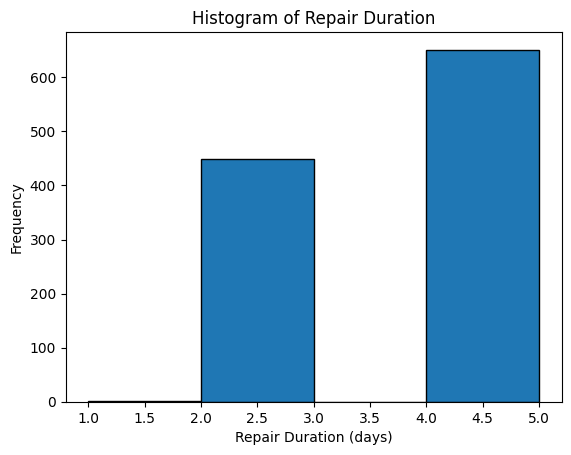

In [9]:
import matplotlib.pyplot as plt
plt.hist(df['Repair Duration'], bins=4, edgecolor='black')
plt.title('Histogram of Repair Duration')
plt.xlabel('Repair Duration (days)')
plt.ylabel('Frequency')
plt.show()

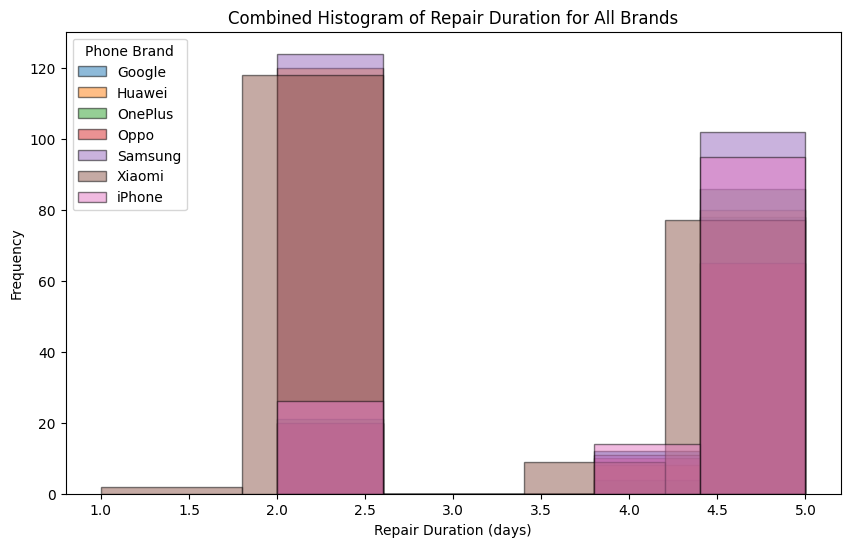

In [10]:
# Create a new DataFrame that includes the brand information
brand_columns = [col for col in df.columns if 'Phone Brand_' in col]

# Melt the DataFrame to have a long-form DataFrame suitable for seaborn/matplotlib
df_melted = df.melt(id_vars=['Repair Duration'], 
                    value_vars=brand_columns, 
                    var_name='Brand', 
                    value_name='Presence')

# Filter the DataFrame to only include rows where the brand is present
df_melted = df_melted[df_melted['Presence'] == 1]

# Extract the brand names
df_melted['Brand'] = df_melted['Brand'].str.replace('Phone Brand_', '')

# Plot the histogram
plt.figure(figsize=(10, 6))

# Plot histogram for each brand with different color
brands = df_melted['Brand'].unique()
for brand in brands:
    plt.hist(df_melted[df_melted['Brand'] == brand]['Repair Duration'], 
             bins=5, alpha=0.5, label=brand, edgecolor='black')

plt.title('Combined Histogram of Repair Duration for All Brands')
plt.xlabel('Repair Duration (days)')
plt.ylabel('Frequency')
plt.legend(title='Phone Brand')
plt.show()

## **5. Model Training and Evaluation Setup**
Using the sk-learn library, we facilitate the training and evaluation of our predictive model. Initially, we preprocess the dataset by excluding non-predictive columns such as 'Repair Duration', 'Date Received', and 'Date Ready' from our feature set (X). These columns are not directly involved in predicting repair durations but are crucial for understanding temporal aspects and ensuring data integrity. To effectively train and evaluate our model, we split the dataset into training and testing subsets using the train_test_split function from sklearn library. This approach enables us to assess the model's performance, enhancing its reliability and generalizability. To maintain the distribution of repair durations across training and testing sets, we employ the stratify parameter in train_test_split. This ensures that both subsets contain proportional representations of repair durations, thereby preventing bias in model training. We set a random_state of 42 for reproducibility, ensuring consistent results in subsequent runs of our model training and evaluation pipeline.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(['Repair Duration', 'Date Received', 'Date Ready'], axis=1)
y = df['Repair Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

## **6. Comparative Analysis of Machine Learning Classifiers for Predicting Repair Durations**
These steps collectively demonstrate the application of different learning classifiers to predict repair durations based on smartphone service data. Each classifier offers a unique approach to learning from the data and making predictions, from neural networks (MLPClassifier), linear models (LogisticRegression), to tree-based models (DecisionTreeClassifier) and SVM (SVC). By comparing their accuracies and performance metrics such as precision, recall, and F1-score from the classification report, we can analyze which model best suits the dataset and problem domain. The confusion matrix further provides insights into the model's ability to correctly classify repair durations into different categories.
<br><br>
First we tried with the MLP Classifier and evaluated the model's performance using metrics such as accuracy and classification report. The accuracy was ranging from 0.74 to 0.80 which is the proportion of correctly predicted instances out of total number of instances in the test set. We also tested for Precision, Recall, F1-score, and Support for each class. Precision is representing the correct predictions for each class, Recall is the true positives correctlu predicted, F1-Score is the harmonic mean of precision and recall, and Support is the number of occurences of each class.

In [12]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=20000, activation="tanh", solver="lbfgs")
mlpc.fit(X_train, y_train)
y_pred=mlpc.predict(X_test)

print(mlpc.score(X_test,y_test))
# Precision for correct predictions for each class
# Recall of true positives correctly predicted
# F1-Score harmonic mean of precision and recall
# Support, the number of occurences of each class
print(classification_report(y_test, y_pred))

0.7898550724637681
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.76      0.79      0.78       112
           4       0.82      0.53      0.64        17
           5       0.81      0.82      0.81       146

    accuracy                           0.79       276
   macro avg       0.85      0.78      0.81       276
weighted avg       0.79      0.79      0.79       276



In [13]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(svc.score(X_test, y_test))

0.6594202898550725


#### **6.1 Trying Regression model**
The nature of the project is of classification, but when searching for the right model we have to try everything to see what will work the best for our prediction. After trying using the Regression model, the results were below average and not satifying, we continued with trying other techniques using classification instead.

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_test, y_test))

0.6666666666666666


#### **6.2 Decision Tree Classifier**
The Decision Tree Classifier implemented in this project has shown promising performance with an accuracy score of 0.866 on the test dataset. This classifier is part of the family of supervised learning algorithms used for classification tasks, where it recursively partitions the data based on features to make predictions. <br><br>
The Decision Tree Classifier was initialized with random_state=42, ensuring reproducibility, and using the gini criterion for impurity calculation during node splitting.  The accuracy score of 0.866 indicates that approximately 87% of the predictions made by the model align with the true labels in the test set. With the Decision Tree Classifier, this project demonstrates its utility in addressing classification tasks with a balanced approach to performance and interpretability.

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, criterion="gini", splitter= "random")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(dt.score(X_test, y_test))

0.8659420289855072


In [16]:
importances = dt.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
print(feature_importances.sort_values(ascending=False))

Month Received                 0.144950
Day of Week Received           0.089293
Phone Brand_Google             0.050555
Phone Brand_Oppo               0.039366
Phone Brand_OnePlus            0.038839
                                 ...   
Phone Model_Mate 10 Lite       0.000000
Phone Model_Mate 10            0.000000
Phone Model_Honor 20           0.000000
Phone Model_Galaxy Z Fold 4    0.000000
Phone Model_Mate 160           0.000000
Length: 335, dtype: float64


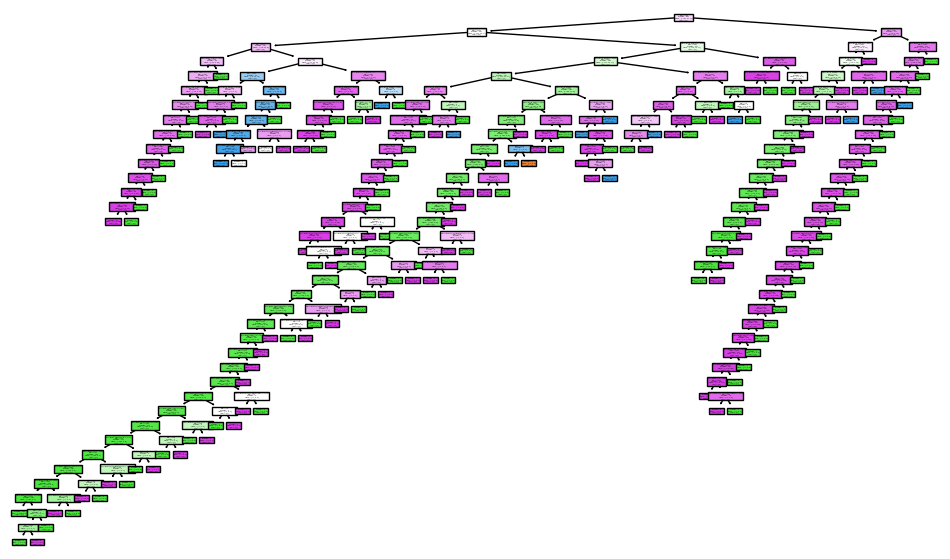

In [17]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(12, 7))
tree.plot_tree(dt, ax=ax, filled=True, feature_names=X.columns, class_names=True)
plt.show()


In [18]:
def classify_duration(duration):
    if duration <= 2:
        return 'fast'
    elif duration <= 4:
        return 'mid'
    else:
        return 'slow'

df['Duration Category'] = df['Repair Duration'].apply(classify_duration)

In [19]:
df.head()

,Date Received,Date Ready,Phone Brand_Google,Phone Brand_Huawei,Phone Brand_OnePlus,Phone Brand_Oppo,Phone Brand_Samsung,Phone Brand_Xiaomi,Phone Brand_iPhone,Phone Model_10,...,Phone Problem_Charging Port Repair,Phone Problem_LCD Replacement,Phone Problem_Screen Repair,Phone Problem_Screen Replacement,Phone Problem_Speaker Replacement,Phone Problem_Water Damage Repair,Month Received,Day of Week Received,Repair Duration,Duration Category
0,2022-05-15,2022-05-20,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,5,6,5,slow
1,2022-06-10,2022-06-15,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,6,4,5,slow
2,2022-07-01,2022-07-05,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,7,4,4,mid
3,2022-08-02,2022-08-07,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,8,1,5,slow
4,2022-09-05,2022-09-10,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,9,0,5,slow


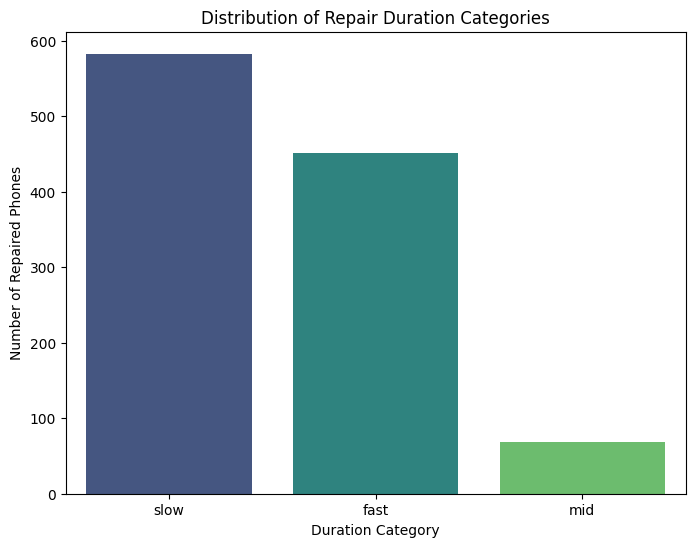

In [20]:
import seaborn as sns

category_counts = df['Duration Category'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='Duration Category', data=df, order=category_counts.index, palette='viridis')
plt.title('Distribution of Repair Duration Categories')
plt.xlabel('Duration Category')
plt.ylabel('Number of Repaired Phones')
plt.show()

<Figure size 1200x800 with 0 Axes>

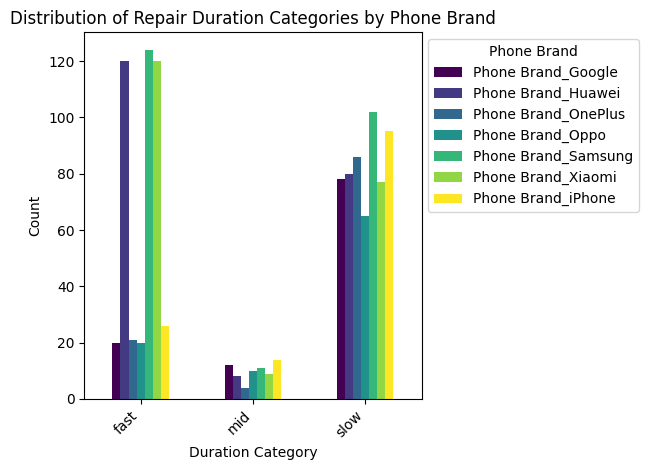

In [21]:
brand_category_counts = df.groupby('Duration Category')[df.columns[df.columns.str.startswith('Phone Brand_')]].sum()

plt.figure(figsize=(12, 8))
brand_category_counts.plot(kind='bar', colormap='viridis')
plt.title('Distribution of Repair Duration Categories by Phone Brand')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Phone Brand', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()